**Задача**

Требуется, на основании имеющихся данных о клиентах банка, построить модель, используя обучающий датасет, для прогнозирования невыполнения долговых обязательств по текущему кредиту. Выполнить прогноз для примеров из тестового датасета.

**Наименование файлов с данными**

course_project_train.csv - обучающий датасет<br>
course_project_test.csv - тестовый датасет

**Целевая переменная**

Credit Default - факт невыполнения кредитных обязательств

**Метрика качества**

F1-score (sklearn.metrics.f1_score)

**Требования к решению**

*Целевая метрика*
* F1 > 0.5
* Метрика оценивается по качеству прогноза для главного класса (1 - просрочка по кредиту)

*Решение должно содержать*
1. Тетрадка Jupyter Notebook с кодом Вашего решения, названная по образцу {ФИО}\_solution.ipynb, пример SShirkin\_solution.ipynb
2. Файл CSV с прогнозами целевой переменной для тестового датасета, названный по образцу {ФИО}\_predictions.csv, пример SShirkin\_predictions.csv

*Рекомендации для файла с кодом (ipynb)*
1. Файл должен содержать заголовки и комментарии (markdown)
2. Повторяющиеся операции лучше оформлять в виде функций
3. Не делать вывод большого количества строк таблиц (5-10 достаточно)
4. По возможности добавлять графики, описывающие данные (около 3-5)
5. Добавлять только лучшую модель, то есть не включать в код все варианты решения проекта
6. Скрипт проекта должен отрабатывать от начала и до конца (от загрузки данных до выгрузки предсказаний)
7. Весь проект должен быть в одном скрипте (файл ipynb).
8. Допускается применение библиотек Python и моделей машинного обучения,
которые были в данном курсе.

**Сроки сдачи**

Cдать проект нужно в течение 5 дней после окончания последнего вебинара.
Оценки работ, сданных до дедлайна, будут представлены в виде рейтинга, ранжированного по заданной метрике качества.
Проекты, сданные после дедлайна или сданные повторно, не попадают в рейтинг, но можно будет узнать результат.

### Примерное описание этапов выполнения курсового проекта<a class="anchor" id="course_project_steps"></a>

**Построение модели классификации**
1. Обзор обучающего датасета
2. Обработка выбросов
3. Обработка пропусков
4. Анализ данных
5. Отбор признаков
6. Балансировка классов
7. Подбор моделей, получение бейзлана
8. Выбор наилучшей модели, настройка гиперпараметров
9. Проверка качества, борьба с переобучением
10. Интерпретация результатов

**Прогнозирование на тестовом датасете**
1. Выполнить для тестового датасета те же этапы обработки и постронияния признаков
2. Спрогнозировать целевую переменную, используя модель, построенную на обучающем датасете
3. Прогнозы должны быть для всех примеров из тестового датасета (для всех строк)
4. Соблюдать исходный порядок примеров из тестового датасета

**Описание датасета**

* **Home Ownership** - домовладение
* **Annual Income** - годовой доход
* **Years in current job** - количество лет на текущем месте работы
* **Tax Liens** - налоговые обременения
* **Number of Open Accounts** - количество открытых счетов
* **Years of Credit History** - количество лет кредитной истории
* **Maximum Open Credit** - наибольший открытый кредит
* **Number of Credit Problems** - количество проблем с кредитом
* **Months since last delinquent** - количество месяцев с последней просрочки платежа
* **Bankruptcies** - банкротства
* **Purpose** - цель кредита
* **Term** - срок кредита
* **Current Loan Amount** - текущая сумма кредита
* **Current Credit Balance** - текущий кредитный баланс
* **Monthly Debt** - ежемесячный долг
* **Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

In [10]:
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import warnings
warnings.filterwarnings("ignore")

In [11]:
TRAIN_PATH = 'C:/Users/Anatoly/Desktop/Python_and_DS/course_project/course_project_train/course_project_train.csv'
TEST_PATH = 'C:/Users/Anatoly/Desktop/Python_and_DS/course_project/course_project_test/course_project_test.csv'

In [12]:
df_train = pd.read_csv(TRAIN_PATH)
df_train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [13]:
df_test = pd.read_csv(TEST_PATH)
df_test.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0


In [14]:
df_train['Home Ownership'].unique()

array(['Own Home', 'Home Mortgage', 'Rent', 'Have Mortgage'], dtype=object)

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
Home Ownership                  7500 non-null object
Annual Income                   5943 non-null float64
Years in current job            7129 non-null object
Tax Liens                       7500 non-null float64
Number of Open Accounts         7500 non-null float64
Years of Credit History         7500 non-null float64
Maximum Open Credit             7500 non-null float64
Number of Credit Problems       7500 non-null float64
Months since last delinquent    3419 non-null float64
Bankruptcies                    7486 non-null float64
Purpose                         7500 non-null object
Term                            7500 non-null object
Current Loan Amount             7500 non-null float64
Current Credit Balance          7500 non-null float64
Monthly Debt                    7500 non-null float64
Credit Score                    5943 non-null float64
Credit Default                  7

In [16]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
Home Ownership                  2500 non-null object
Annual Income                   1987 non-null float64
Years in current job            2414 non-null object
Tax Liens                       2500 non-null float64
Number of Open Accounts         2500 non-null float64
Years of Credit History         2500 non-null float64
Maximum Open Credit             2500 non-null float64
Number of Credit Problems       2500 non-null float64
Months since last delinquent    1142 non-null float64
Bankruptcies                    2497 non-null float64
Purpose                         2500 non-null object
Term                            2500 non-null object
Current Loan Amount             2500 non-null float64
Current Credit Balance          2500 non-null float64
Monthly Debt                    2500 non-null float64
Credit Score                    1987 non-null float64
dtypes: float64(12), object(4)
me

Вывод по тесту и по трейну: много пропусков, необходимо коротко и четко понять сколько их и где их больше всего. Далее нужно понять чем мы будем их заполнять. 

все столбцы отправим в один список. Посчитаем количество пропущенных значений в столбце с помощью функции isna()

In [17]:
df_train.columns.values.tolist

<function ndarray.tolist>

In [18]:
def check_missing_values(df):
    columns = df.columns.values.tolist()
    for n in columns:
        if df[n].isna().sum() > 0:
            print(f"столбец '{n}' -  пропусков в столбце: {df[n].isna().sum()}")

In [19]:
check_missing_values(df_train)

столбец 'Annual Income' -  пропусков в столбце: 1557
столбец 'Years in current job' -  пропусков в столбце: 371
столбец 'Months since last delinquent' -  пропусков в столбце: 4081
столбец 'Bankruptcies' -  пропусков в столбце: 14
столбец 'Credit Score' -  пропусков в столбце: 1557


In [20]:
check_missing_values(df_test)

столбец 'Annual Income' -  пропусков в столбце: 513
столбец 'Years in current job' -  пропусков в столбце: 86
столбец 'Months since last delinquent' -  пропусков в столбце: 1358
столбец 'Bankruptcies' -  пропусков в столбце: 3
столбец 'Credit Score' -  пропусков в столбце: 513


Получим описание тестового и трейнового датасета с помощью стандартной функции describe()

In [21]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Annual Income,5943.0,1.366392e+06,8.453392e+05,164597.0,844341.0,1168386.0,1640137.00,1.014934e+07
Tax Liens,7500.0,3.013333e-02,2.716035e-01,0.0,0.0,0.0,0.00,7.000000e+00
Number of Open Accounts,7500.0,1.113093e+01,4.908924e+00,2.0,8.0,10.0,14.00,4.300000e+01
Years of Credit History,7500.0,1.831747e+01,7.041946e+00,4.0,13.5,17.0,21.80,5.770000e+01
Maximum Open Credit,7500.0,9.451537e+05,1.602622e+07,0.0,279229.5,478159.0,793501.50,1.304726e+09
Number of Credit Problems,7500.0,1.700000e-01,4.985978e-01,0.0,0.0,0.0,0.00,7.000000e+00
Months since last delinquent,3419.0,3.469260e+01,2.168881e+01,0.0,16.0,32.0,50.00,1.180000e+02
Bankruptcies,7486.0,1.171520e-01,3.471917e-01,0.0,0.0,0.0,0.00,4.000000e+00
Current Loan Amount,7500.0,1.187318e+07,3.192612e+07,11242.0,180169.0,309573.0,519882.00,1.000000e+08
Current Credit Balance,7500.0,2.898332e+05,3.178714e+05,0.0,114256.5,209323.0,360406.25,6.506797e+06


In [22]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Annual Income,1987.0,1.366922e+06,9.171252e+05,106533.0,852311.50,1178475.0,1629734.5,14975610.0
Tax Liens,2500.0,3.520000e-02,3.862909e-01,0.0,0.00,0.0,0.0,15.0
Number of Open Accounts,2500.0,1.118440e+01,4.852774e+00,1.0,8.00,10.0,14.0,48.0
Years of Credit History,2500.0,1.832592e+01,7.254659e+00,3.9,13.40,17.0,22.1,53.4
Maximum Open Credit,2500.0,7.105704e+05,1.511983e+06,0.0,278586.00,478676.0,802598.5,54484386.0
Number of Credit Problems,2500.0,1.620000e-01,5.598941e-01,0.0,0.00,0.0,0.0,15.0
Months since last delinquent,1142.0,3.418126e+01,2.202428e+01,0.0,16.00,30.0,50.0,82.0
Bankruptcies,2497.0,1.069283e-01,3.571893e-01,0.0,0.00,0.0,0.0,5.0
Current Loan Amount,2500.0,1.215572e+07,3.226097e+07,15422.0,187126.50,322366.0,522582.5,99999999.0
Current Credit Balance,2500.0,2.963966e+05,3.783020e+05,0.0,110114.50,207385.0,366348.5,6030087.0


В обоих датасетах (тест и трейн) пропуски совершены в одних и тех же признаках. 

# **Категориальные признаки**

In [23]:
df_train['Home Ownership'].unique()

array(['Own Home', 'Home Mortgage', 'Rent', 'Have Mortgage'], dtype=object)

Здесь будем кодировать в dummy переменные 

In [24]:
df_train['Years in current job'].unique()

array([nan, '10+ years', '8 years', '6 years', '7 years', '5 years',
       '1 year', '< 1 year', '4 years', '3 years', '2 years', '9 years'],
      dtype=object)

Здесь будем перекодировать данные в числовые по первому символу (с помощью int). 10+ лет заменим на 15, чтобы отличалось от 10. Также надо понимать, что у нас тут пропуски. Кол-во пропусков в столбце: 371. Рассмотрим признак подробнее.  

In [25]:
df_train['Years in current job'].value_counts()

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64

Менее 1 года = 0. Пропуск скорее всего означает то же самое. Заменим его пока нулем.  

In [26]:
df_train['Years in current job'] = df_train['Years in current job'].fillna(0)

In [27]:
def convert_years(df): 
    for year in df_train['Years in current job'].unique(): 
        if year in [0, '< 1 year']:
            df.loc[df['Years in current job'] == year, 'Number of years in current job'] = 0
        elif year == '10+ years':
            df.loc[df['Years in current job'] == year, 'Number of years in current job'] = 15 
        else:
            df.loc[df['Years in current job'] == year, 'Number of years in current job'] = int(year.split(' ')[0])
    return df

In [28]:
df_train = convert_years(df_train)

In [29]:
df_train['Years in current job'].unique()

array([0, '10+ years', '8 years', '6 years', '7 years', '5 years',
       '1 year', '< 1 year', '4 years', '3 years', '2 years', '9 years'],
      dtype=object)

In [30]:
df_train['Purpose'].unique()

array(['debt consolidation', 'other', 'home improvements', 'take a trip',
       'buy a car', 'small business', 'business loan', 'wedding',
       'educational expenses', 'buy house', 'medical bills', 'moving',
       'major purchase', 'vacation', 'renewable energy'], dtype=object)

Сделав из этих переменные dummy я получил в итоге 54 признака. Мне до сих пор непонятно что с этим делать и как групировать.  

In [31]:
df_train['Term'].unique()

array(['Short Term', 'Long Term'], dtype=object)

Здесь также кодируем в dummy переменные. 

In [32]:
df_train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Number of years in current job
0,Own Home,482087.0,0,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0,0.0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1,15.0
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0,8.0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0,6.0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0,8.0


In [33]:
def conversion_dummy(df, dummy_column):
    for cat_feature in dummy_column:
        df = pd.concat([df, pd.get_dummies(df[cat_feature], prefix=cat_feature)], axis=1)
    return df

In [34]:
dummy_train = conversion_dummy(df_train, ['Home Ownership'])

In [35]:
dummy_train

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,...,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Number of years in current job,Home Ownership_Have Mortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent
0,Own Home,482087.0,0,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,...,99999999.0,47386.0,7914.0,749.0,0,0.0,0,0,1,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,...,264968.0,394972.0,18373.0,737.0,1,15.0,0,0,1,0
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,...,99999999.0,308389.0,13651.0,742.0,0,8.0,0,1,0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,...,121396.0,95855.0,11338.0,694.0,0,6.0,0,0,1,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,...,125840.0,93309.0,7180.0,719.0,0,8.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,Rent,402192.0,< 1 year,0.0,3.0,8.5,107866.0,0.0,NaN,0.0,...,129360.0,73492.0,1900.0,697.0,0,0.0,0,0,0,1
7496,Home Mortgage,1533984.0,1 year,0.0,10.0,26.5,686312.0,0.0,43.0,0.0,...,444048.0,456399.0,12783.0,7410.0,1,1.0,0,1,0,0
7497,Rent,1878910.0,6 years,0.0,12.0,32.1,1778920.0,0.0,NaN,0.0,...,99999999.0,477812.0,12479.0,748.0,0,6.0,0,0,0,1
7498,Home Mortgage,NaN,0,0.0,21.0,26.5,1141250.0,0.0,NaN,0.0,...,615274.0,476064.0,37118.0,NaN,0,0.0,0,1,0,0


# Количественные признаки

**Number of Open Account - колво открытых счетов**

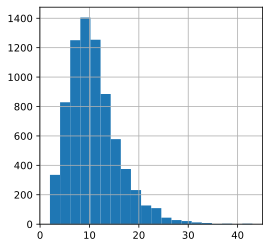

In [36]:
df_train.loc[:, 'Number of Open Accounts'].hist(figsize=(4, 4), bins=20, grid=True);

На схеме явно видно, что более 22-23 счетов - скорее выброс, чем нормальное явление. Его можно заменить модой. 

In [37]:
##Annual income - годовой доход

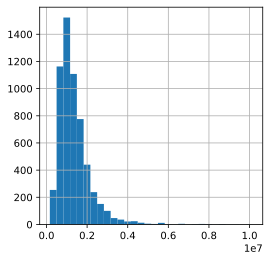

In [38]:
df_train.loc[:, 'Annual Income'].hist(figsize=(4, 4), bins=30, grid=True);

1) Как мы помним, тут много пропусков в таблице: 1557. Примерно 20% от нашей выборки. 

**Tax Liens - общее кол-во налогов к оплате**

In [39]:
df_train['Tax Liens'].value_counts()

0.0    7366
1.0      83
2.0      30
3.0      10
4.0       6
5.0       2
6.0       2
7.0       1
Name: Tax Liens, dtype: int64

**Years of Credit History - сколько лет кредитной истории**

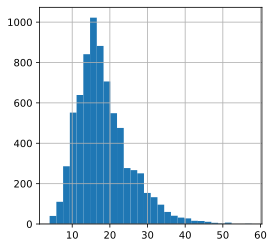

In [40]:
df_train.loc[:, 'Years of Credit History'].hist(figsize=(4, 4), bins=30, grid=True);

Пенсия в США начинается с 65 лет. С 18, допустим, можно взять кредит. Тогда значение выше 47 будет считаться как выброс. Заменим его не медианное значение. 

In [41]:
df_train.loc[df_train['Years of Credit History'] > 47, :].shape[0]

15

**Number of Credit Problems - количество проблем c кредитом**

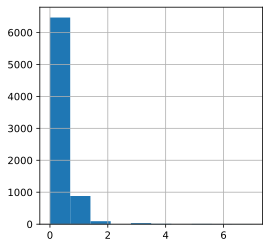

In [42]:
df_train.loc[:, 'Number of Credit Problems'].hist(figsize=(4, 4), bins=10, grid=True)

In [43]:
df_train['Number of Credit Problems'].value_counts()

0.0    6469
1.0     882
2.0      93
3.0      35
4.0       9
5.0       7
6.0       4
7.0       1
Name: Number of Credit Problems, dtype: int64

In [44]:
df_train.loc[df_train['Number of Credit Problems'] > 1, :].shape[0]

149

**Maximum Open Credit - наибольший открытый кредит**

Стандартное отклонение намного выше 3/4 квантиля (примерно на 3 знака). Все, что выше 3/4 квантиля + среднее значение будем считать выбросом. Заменим на медиану. 

In [45]:
df_train.loc[df_train['Maximum Open Credit'] > 1300000, :].shape[0]

684

**Bankruptcies - банкротства**

In [46]:
df_train['Bankruptcies'].unique()

array([ 1.,  0.,  3., nan,  2.,  4.])

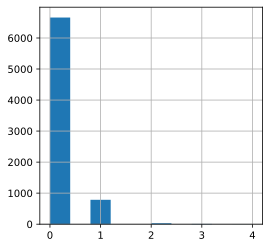

In [47]:
df_train.loc[:, 'Bankruptcies'].hist(figsize=(4, 4), bins=10, grid=True)

In [48]:
df_train['Bankruptcies'].value_counts()

0.0    6660
1.0     786
2.0      31
3.0       7
4.0       2
Name: Bankruptcies, dtype: int64

Пропуски заменяем модой. 

**Months since last delinquent - количество месяцев с последней просрочки платежа**

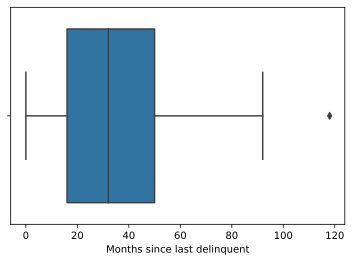

In [49]:
sns.boxplot(df_train['Months since last delinquent'])

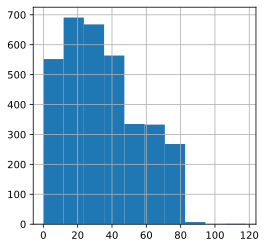

In [50]:
df_train.loc[:, 'Months since last delinquent'].hist(figsize=(4, 4), bins=10, grid=True)

In [51]:
df_train.loc[df_train['Months since last delinquent'] > 100].shape[0]

1

Пропуски заменим на нули, потому что скорее всего человек изрядно платит по кредитам. 

будем считать все, что свыше 100 - выбросы. 

**Current Loan Amount - текущая сумма кредита**

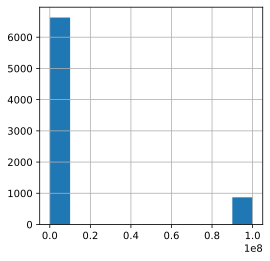

In [52]:
df_train.loc[:, 'Current Loan Amount'].hist(figsize=(4, 4), bins=10, grid=True)

In [53]:
df_train.loc[df_train['Current Loan Amount'] == 99999999.0].shape[0]

870

In [54]:
df_train.loc[(df_train['Current Loan Amount'] == 99999999.0) & (df_train['Credit Default'] == 0)].shape[0]

870

Ну вот мы и вскрыли первый признак, что датасет был искусственно искалечан... 

**Monthly Debt - ежемесячный долг**

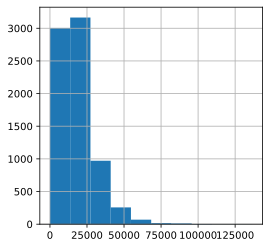

In [55]:
df_train.loc[:, 'Monthly Debt'].hist(figsize=(4, 4), bins=10, grid=True)

In [56]:
df_train.loc[df_train['Monthly Debt'] > 50000, 'Monthly Debt'].shape[0]

156

3/4 oт Annual Income = 1 700 000 usd. Следовательно, логично предположить, что платеж в 125 000 может быть. Заменим то, что свыше 50 000 тысяч на медиану. 

**Current Credit Balance - текущий кредитный баланс**

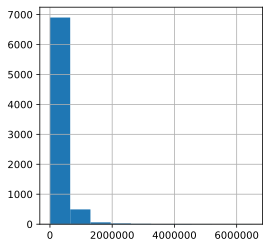

In [57]:
df_train.loc[:, 'Current Credit Balance'].hist(figsize=(4, 4), bins=10, grid=True)

In [58]:
df_train.loc[df_train['Current Credit Balance'] > 1500000].shape[0]

74

Кредитный лимит на карте в 1 500 000 видится еще разумным. Примерно столько составляет 3/4 от Annual Income. Все, что свыше - выброс. 

**'Credit Score' Кредитный рейтинг**

Кредитный рейтинг от 300 до 850 баллов. 

Все, что ниже 300 будем считать как выброс данных. Все, что выше 850 - ошибка набора (добавление лишнего "0") - делаем целочисленное деление на 10.  

In [59]:
df_train['Credit Score'].isna().sum()

1557

Пропуски заменим на нули. Некоторые выбросы - на медиану. Про кредитный скоринг писал выше. 

In [60]:
def fillna_df(df):
    df['Credit Score'] = df['Credit Score'].fillna(0)
    df.loc[df['Credit Score'] < 300, 'Credit Score'] = 0
    df.loc[df['Credit Score'] > 850, 'Credit Score'] = df['Credit Score'] // 10
    df['Bankruptcies'] = df['Bankruptcies'].fillna(df['Bankruptcies'].mode()[0])
    df['Months since last delinquent'] = df['Months since last delinquent'].fillna(0)
    df['Years in current job'] = df['Years in current job'].fillna(0)
    df.loc[df['Number of Credit Problems'] > 1, 'Number of Credit Problems'] = 1
    df.loc[df['Term'] == 'Long Term', 'Term'] = 1
    df.loc[df['Term'] == 'Short Term', 'Term'] = 0
    df.loc[df['Bankruptcies'] > 1, 'Bankruptcies'] = 1
    return df

def clear_df(init_df, df):
    df.loc[df['Tax Liens'] > 1, 'Tax Liens'] = 1
    df.loc[df['Maximum Open Credit'] > 1300000, 'Maximum Open Credit'] = init_df['Maximum Open Credit'].median()
    df.loc[df['Months since last delinquent'] > 100, 'Months since last delinquent'] = init_df['Months since last delinquent'].median()
    df.loc[df['Number of Open Accounts'] > 23, 'Number of Open Accounts'] = init_df['Number of Open Accounts'].median()
    df.loc[df['Years of Credit History'] > 47, 'Years of Credit History'] = init_df['Years of Credit History'].median()
    df.loc[df['Current Credit Balance'] > 1250000, 'Current Credit Balance'] = init_df['Current Credit Balance'].median()
    df.loc[df['Monthly Debt'] > 50000, 'Monthly Debt'] = init_df['Monthly Debt'].median()
    return df

In [61]:
temp_train = fillna_df(dummy_train)

In [63]:
temp_train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,...,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Number of years in current job,Home Ownership_Have Mortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent
0,Own Home,482087.0,0,0.0,11.0,26.3,685960.0,1.0,0.0,1.0,...,99999999.0,47386.0,7914.0,749.0,0,0.0,0,0,1,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,0.0,0.0,...,264968.0,394972.0,18373.0,737.0,1,15.0,0,0,1,0
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,0.0,0.0,...,99999999.0,308389.0,13651.0,742.0,0,8.0,0,1,0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,0.0,1.0,...,121396.0,95855.0,11338.0,694.0,0,6.0,0,0,1,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,0.0,0.0,...,125840.0,93309.0,7180.0,719.0,0,8.0,0,0,0,1


In [64]:
temp_train_final = clear_df(dummy_train, temp_train)

In [65]:
temp_train_final.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,...,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Number of years in current job,Home Ownership_Have Mortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent
0,Own Home,482087.0,0,0.0,11.0,26.3,685960.0,1.0,0.0,1.0,...,99999999.0,47386.0,7914.0,749.0,0,0.0,0,0,1,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,0.0,0.0,...,264968.0,394972.0,18373.0,737.0,1,15.0,0,0,1,0
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,0.0,0.0,...,99999999.0,308389.0,13651.0,742.0,0,8.0,0,1,0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,0.0,1.0,...,121396.0,95855.0,11338.0,694.0,0,6.0,0,0,1,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,0.0,0.0,...,125840.0,93309.0,7180.0,719.0,0,8.0,0,0,0,1


Вопросы по теоретической части урока 1:

- Привести по 2 примера, когда лучше максимизировать Precision, а когда Recall?
- Почему мы используем F-меру, почему, например, нельзя просто взять среднее от Precision и Recall?

*Precision* - точность отражает какой процент объектов, отнесённых к "основному" классу, действительно являются таковыми.

*Recall* - полнота отражает какой процент объектов "основного" класса было обнаружено алгоритмом.

<center>$\large precision = \LARGE \frac{TP}{TP \: + \: FP} \:\:\:\:\: \large recall = \LARGE \frac{TP}{TP \: + \: FN}$<center>

Precision можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными, а recall показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм.

Классической задачей по балансу этих метрик является отток клиентов (сотовая связь, подписка на Netflix). 
Precision = 
FN = объект отнесли к неправильному классу, но он им не оказался. 
FP = объект отнесли к предсказанному классу, но он им не оказался. 

Максимизация precision или recall относится к бизнес задачам Machine learning. FN увеличивают в случае, когда цена ошибки стоит жизни миллионов: распознавание лиц преступников, детектирование запрещенных препаратов или классификация опасных объектов на аэропорту, АЭС, ГЭС. 
FP: при обнаружении спама относит хорошее письмо к спаму, рекомендация Перекрестка по покупке ранее купленных аналогичных товаров. 

- 2 вопрос: Precision и Recall дают довольно исчерпывающую характеристику классификатора, причем «с разных углов». Обычно при построении подобного рода систем приходится все время балансировать между двумя этими метриками. Если вы пытаетесь повысить Recall, делая классификатор более «оптимистичным», это приводит к падению Precision из-за увеличения числа ложно-положительных ответов. Если же вы подкручиваете свой классификатор, делая его более «пессимистичным», например, строже фильтруя результаты, то при росте Precision это вызовет одновременное падение Recall из-за отбраковки какого-то числа правильных ответов. Поэтому удобно для характеристики классификатора использовать одну величину, так называемую метрику F1. 

# 2 задание

Анализ данных - стат.анализ и принятие решений по составу категорийных признаков, оценка распределений для тестового и тренировочного наборов, анализ выбросов, мультиколлинеарность и трансформации.

In [66]:
from scipy.stats import shapiro, normaltest, ttest_rel, ttest_ind, kstest
from statsmodels.graphics.gofplots import qqplot
import numpy as np

In [67]:
import warnings
warnings.simplefilter('ignore')


Категорийные признаки: 
    - Home Ownership
    - Term
    - Purpose

In [68]:
temp_train_final.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,...,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Number of years in current job,Home Ownership_Have Mortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent
0,Own Home,482087.0,0,0.0,11.0,26.3,685960.0,1.0,0.0,1.0,...,99999999.0,47386.0,7914.0,749.0,0,0.0,0,0,1,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,0.0,0.0,...,264968.0,394972.0,18373.0,737.0,1,15.0,0,0,1,0
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,0.0,0.0,...,99999999.0,308389.0,13651.0,742.0,0,8.0,0,1,0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,0.0,1.0,...,121396.0,95855.0,11338.0,694.0,0,6.0,0,0,1,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,0.0,0.0,...,125840.0,93309.0,7180.0,719.0,0,8.0,0,0,0,1


In [69]:
ID = {'ID': np.arange(1, 7501, 1)}

In [70]:
ID_fin = pd.DataFrame(ID)

In [71]:
ID_fin

,ID
0,1
1,2
2,3
3,4
4,5
...,...
7495,7496
7496,7497
7497,7498
7498,7499


In [72]:
temp_train_fin = pd.concat([temp_train_final, ID_fin], axis = 1)

In [73]:
temp_train_fin.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,...,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Number of years in current job,Home Ownership_Have Mortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,ID
0,Own Home,482087.0,0,0.0,11.0,26.3,685960.0,1.0,0.0,1.0,...,47386.0,7914.0,749.0,0,0.0,0,0,1,0,1
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,0.0,0.0,...,394972.0,18373.0,737.0,1,15.0,0,0,1,0,2
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,0.0,0.0,...,308389.0,13651.0,742.0,0,8.0,0,1,0,0,3
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,0.0,1.0,...,95855.0,11338.0,694.0,0,6.0,0,0,1,0,4
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,0.0,0.0,...,93309.0,7180.0,719.0,0,8.0,0,0,0,1,5


In [74]:
from scipy.stats import shapiro
from scipy.stats import probplot
from scipy.stats import ttest_ind, mannwhitneyu
from scipy.stats import chi2_contingency
from statsmodels.stats.weightstats import zconfint

**Оценка Term в разрезе Credit Default**

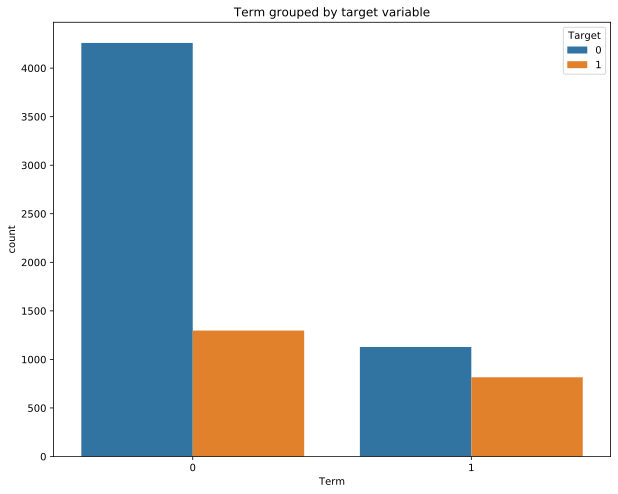

In [75]:
plt.figure(figsize=(10, 8))

sns.countplot(x="Term", hue = 'Credit Default', data = temp_train_fin)
plt.title('Term grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

Выдвинем гипотезу, что частоты признака Term и Credit Default согласованы. Альтернативная гипотеза: расхождения статистически значимы и их объединять нельзя. Параметры: 
    - уровень значимости = 0.05
    - критическая область двухсторонняя
    - Критерий Хи-квадрат Пирсона
    - 

In [76]:
term_target = temp_train_fin.loc[temp_train_fin['Term'].isin([0, 1]), ['ID', 'Term', 'Credit Default']].sample(1000)

In [77]:
table = term_target.pivot_table(values = 'ID', index = 'Term', columns = 'Credit Default', aggfunc = 'count')

In [78]:
table

Credit Default,0,1
Term,,
0,549,166
1,167,118


In [79]:
chi2, p, dof, expected = chi2_contingency(table, correction=False)
p

8.550065565292233e-09

p-value получилось меньше выбранного уровня значимости alpha, соответственно нулевая гипотеза должна быть отвергнута. 

**Признак Purpose**

Основная гипотеза: частоты purpose и credit default согласованы и их можно объединить. Альтернативная гипотеза: расхождения статистически значимы, их объединять нельзя. 

In [80]:
purpose_target = temp_train_fin.loc[temp_train_fin['Purpose'].isin(['debt consolidation', 'other', 'home improvements']),
                                    ['ID', 'Purpose', 'Credit Default']].sample(1000)

In [81]:
temp_train_fin['Purpose'].unique()

array(['debt consolidation', 'other', 'home improvements', 'take a trip',
       'buy a car', 'small business', 'business loan', 'wedding',
       'educational expenses', 'buy house', 'medical bills', 'moving',
       'major purchase', 'vacation', 'renewable energy'], dtype=object)

В моей прошлой работе долго размышлял как поступить с признаком Purpose. Сначала я хотел разбить на dummy переменные, но нагородилось много столбцов. Потом я принял решение залезть под капот и посмотреть на распределение изнутри

In [82]:
temp_train_fin['Purpose'].value_counts()

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpose, dtype: int64

debt consolidation, other, home improvements занимает львиную часть всего распределения. Присвоим им -1, 0, 1. Всем остальным = 2

In [83]:
def convert_purpose(df): 
    for purpose in temp_train_fin['Purpose'].unique(): 
        if purpose == 'debt consolidation':
            df.loc[df['Purpose'] == purpose, 'Classify_purpose'] = -1
        elif purpose == 'other':
            df.loc[df['Purpose'] == purpose, 'Classify_purpose'] = 0 
        elif purpose == 'home improvements':
            df.loc[df['Purpose'] == purpose, 'Classify_purpose'] = 1 
        else:
            df.loc[df['Purpose'] == purpose, 'Classify_purpose'] = 2
    return df

In [84]:
fin_df = convert_purpose(temp_train_fin)

In [85]:
fin_df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,...,Monthly Debt,Credit Score,Credit Default,Number of years in current job,Home Ownership_Have Mortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,ID,Classify_purpose
0,Own Home,482087.0,0,0.0,11.0,26.3,685960.0,1.0,0.0,1.0,...,7914.0,749.0,0,0.0,0,0,1,0,1,-1.0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,0.0,0.0,...,18373.0,737.0,1,15.0,0,0,1,0,2,-1.0
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,0.0,0.0,...,13651.0,742.0,0,8.0,0,1,0,0,3,-1.0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,0.0,1.0,...,11338.0,694.0,0,6.0,0,0,1,0,4,-1.0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,0.0,0.0,...,7180.0,719.0,0,8.0,0,0,0,1,5,-1.0


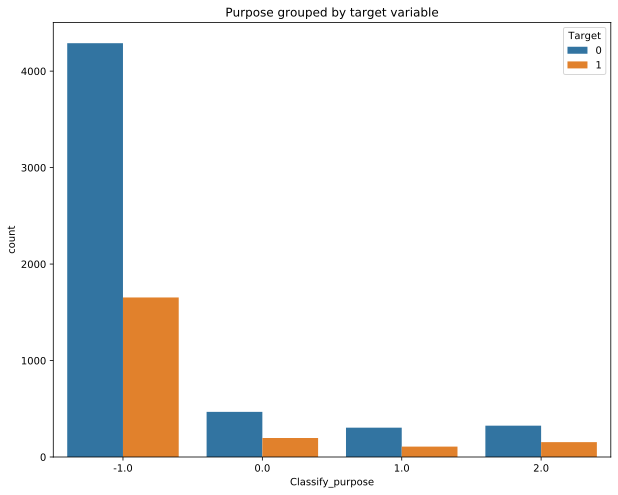

In [86]:
plt.figure(figsize=(10, 8))

sns.countplot(x="Classify_purpose", hue = 'Credit Default', data = fin_df)
plt.title('Purpose grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

In [87]:
purpose_target = fin_df.loc[fin_df['Classify_purpose'].isin([-1, 0]),
                                    ['ID', 'Classify_purpose', 'Credit Default']].sample(1000)

In [88]:
purpose_target.head()

,ID,Classify_purpose,Credit Default
2699,2700,-1.0,1
5265,5266,-1.0,0
2205,2206,-1.0,0
2267,2268,-1.0,0
5711,5712,-1.0,1


In [89]:
table_purpose = purpose_target.pivot_table(values = 'ID', index = 'Classify_purpose', columns = 'Credit Default', aggfunc = 'count')

In [90]:
table_purpose

Credit Default,0,1
Classify_purpose,,
-1.0,653,247
0.0,64,36


In [91]:
chi2, p, dof, expected = chi2_contingency(table_purpose, correction=False)
p

0.07157028790516853

p-value > alpha, следовательно, принимаем нулевую гипотезу. Частоты согласованы, данные можно объединять

**Признак "Home Ownership"**

Нулевая гипотеза: частоты 'home_mortgage' и 'rent' согласованы с credit default. Их можно объединить.

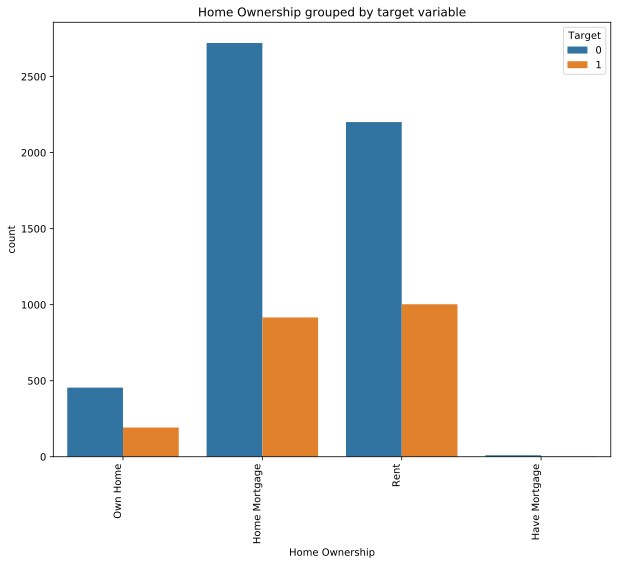

In [92]:
plt.figure(figsize=(10, 8))
''
sns.countplot(x="Home Ownership", hue = 'Credit Default', data = fin_df)
plt.title('Home Ownership grouped by target variable')
plt.legend(title='Target', loc='upper right')
plt.xticks(rotation = 90, ha='right')

plt.show()

In [93]:
ownership_target = fin_df.loc[fin_df['Home Ownership'].isin(['Home Mortgage', 'Rent']),
                                    ['ID', 'Home Ownership', 'Credit Default']].sample(1000)

In [94]:
table_ownership = ownership_target.pivot_table(values = 'ID', index = 'Home Ownership', columns = 'Credit Default', aggfunc = 'count')

In [95]:
table_ownership

Credit Default,0,1
Home Ownership,,
Home Mortgage,422,119
Rent,314,145


In [96]:
chi2, p, dof, expected = chi2_contingency(table_ownership, correction=False)
p

0.000604025617420519

p-value<alpha, следовательно, нулевая гипотеза должна быть отвергнута, данные объединять нельзя.  

**Оценка распределений признаков в разрезе целевой переменной**

In [97]:
fin_df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,...,Monthly Debt,Credit Score,Credit Default,Number of years in current job,Home Ownership_Have Mortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,ID,Classify_purpose
0,Own Home,482087.0,0,0.0,11.0,26.3,685960.0,1.0,0.0,1.0,...,7914.0,749.0,0,0.0,0,0,1,0,1,-1.0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,0.0,0.0,...,18373.0,737.0,1,15.0,0,0,1,0,2,-1.0
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,0.0,0.0,...,13651.0,742.0,0,8.0,0,1,0,0,3,-1.0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,0.0,1.0,...,11338.0,694.0,0,6.0,0,0,1,0,4,-1.0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,0.0,0.0,...,7180.0,719.0,0,8.0,0,0,0,1,5,-1.0


Maximum Open Credit, Monthly Debt, Credit Score, Current Loan Amount, Current Credit Balance, Annual income - наиболее интересные признаки для рассмотрения

Более подробно и показательно рассмотрим Credit Score, все остальные - для оценки распределения признака в разрезе целевой переменной и тест Шапиро-Уилка. 

In [98]:
TARGET_NAME = 'Credit Default'

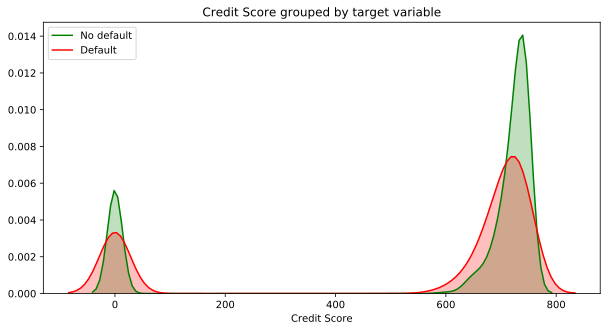

In [100]:
credit_score_with_target = fin_df[['Credit Score', TARGET_NAME]].sample(1000)
credit_score_s = credit_score_with_target['Credit Score']
credit_score_target_0 = credit_score_s[credit_score_with_target[TARGET_NAME] == 0]
credit_score_target_1 = credit_score_s[credit_score_with_target[TARGET_NAME] == 1]

plt.figure(figsize=(10, 5))

sns.kdeplot(credit_score_target_0, shade=True, label='No default', color='g')
sns.kdeplot(credit_score_target_1, shade=True, label='Default', color='r')

plt.xlabel('Credit Score')
plt.title('Credit Score grouped by target variable')
plt.show()

Нулевая гипотеза состоит в том, что среднее значение в двух независимых выборках равны. Уровень значимости: 0.05. Критическая область двухсторонняя. 

Проверим распределения признака на нормальность с помощью критерия Шапиро-Уилка. 

In [101]:
shapiro(credit_score_s)

(0.5641061067581177, 2.802596928649634e-44)

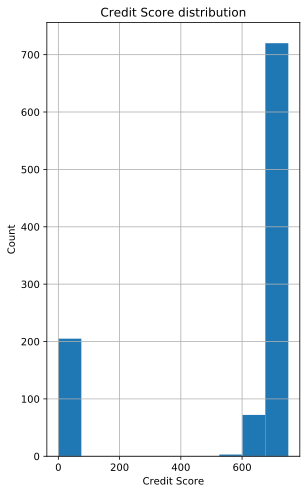

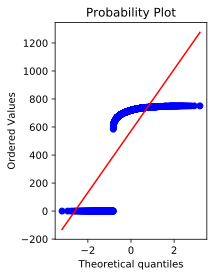

In [102]:
plt.figure(figsize=(10, 8))

ax1 = plt.subplot(121)
ax1.set_xlabel('Credit Score')
ax1.set_ylabel('Count')
ax1.set_title('Credit Score distribution')
credit_score_s.hist()
plt.show()

plt.subplot(122)
probplot(credit_score_s, dist='norm', plot=plt)

plt.show()

Визуальная оценка подтверждает показания критерия Шапиро-Уилка по поводу того, что закон распределения отличный от "нормального", в связи с чем, мы не сможем воспользоваться критерием Стьюдента для проверки гипотезы о равности мат. ожиданий признака 'Credit Score' в группах с просроченным и непросроченным платежом Сredit Default, но мы сможем воспользоваться его непараметрическим аналогом - критерием Манна-Уитни, который не требователен к закону распределения.

In [103]:
mannwhitneyu(credit_score_target_0, credit_score_target_1)

MannwhitneyuResult(statistic=78680.5, pvalue=3.018260871369213e-08)

Согласно значению p-value, гипотеза о равности мат. ожиданий отвергается, но стоит ради дополнительной проверки обратиться к доверительным интервалам.

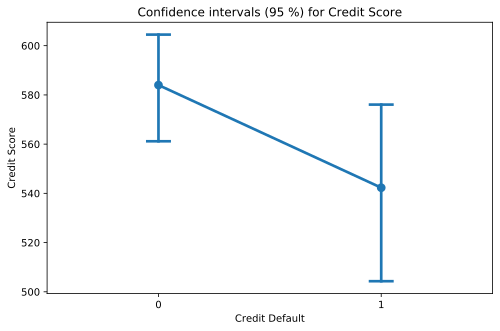

In [104]:
plt.figure(figsize=(8, 5))

sns.pointplot(x=TARGET_NAME, y='Credit Score', data=credit_score_with_target, capsize=.1)

plt.title('Confidence intervals (95 %) for Credit Score')
plt.show()

Показания на графике согласуются с тестом Манна-Уитни и данными теста Шапиро-Уилка. 

На данном примере не удалось реализовать сглаживание и boxcox. Посмотрим далее, сможем ли мы это реализовать. 

In [129]:
def depend_func(variable):
    TARGET_NAME = 'Credit Default'
    temp_with_target = fin_df[[f'{variable}', TARGET_NAME]].sample(1000)
    temp_s = temp_with_target[f'{variable}']
    temp_target_0 = temp_s[temp_with_target[TARGET_NAME] == 0]
    temp_target_1 = temp_s[temp_with_target[TARGET_NAME] == 1]

    plt.figure(figsize=(10, 5))

    sns.kdeplot(temp_target_0, shade=True, label='No default', color='g')
    sns.kdeplot(temp_target_1, shade=True, label='Default', color='r')

    plt.xlabel(f'{variable}')
    plt.title(f'{variable} ' "grouped by target variable")
    plt.show()
    return temp_s, temp_target_0, temp_target_1, temp_with_target

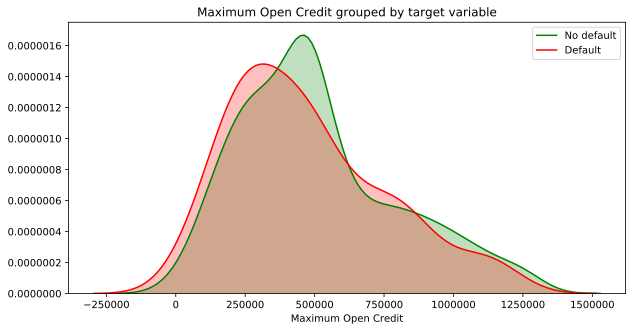

In [130]:
f_open_credit, open_credit_0, open_credit_1, open_credit_with_target = depend_func(variable = 'Maximum Open Credit')

In [131]:
shapiro(f_open_credit)

(0.9498395323753357, 5.931545909314638e-18)

снова P-value<alpha, следовательно, нулевую гипотезу не принимаем. 

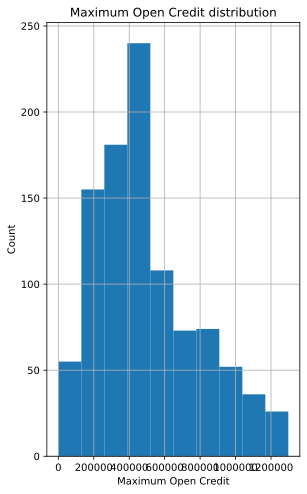

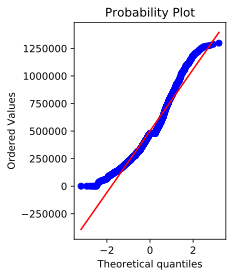

In [132]:
plt.figure(figsize=(10, 8))

ax1 = plt.subplot(121)
ax1.set_xlabel('Maximum Open Credit')
ax1.set_ylabel('Count')
ax1.set_title('Maximum Open Credit distribution')
f_open_credit.hist()
plt.show()

plt.subplot(122)
probplot(f_open_credit, dist='norm', plot=plt)

plt.show()

воспользуемся непараметрическим критерием Манна-Уитни. 

In [133]:
mannwhitneyu(open_credit_0, open_credit_1)

MannwhitneyuResult(statistic=87957.0, pvalue=0.02270801925018997)

pvalue<alpha, следовательно, распределение не является нормальным. 

Обратимся к доверительным интервалам

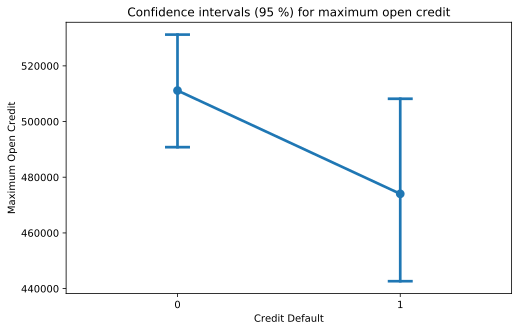

In [134]:
plt.figure(figsize=(8, 5))

sns.pointplot(x=TARGET_NAME, y='Maximum Open Credit', data=open_credit_with_target, capsize=.1)

plt.title('Confidence intervals (95 %) for maximum open credit')
plt.show()

Показания на графике согласуются с тестом Манна-Уитни и данными теста Шапиро-Уилка. Снова на данном примере не удалось реализовать сглаживание boxcox. 

**Annual Income**

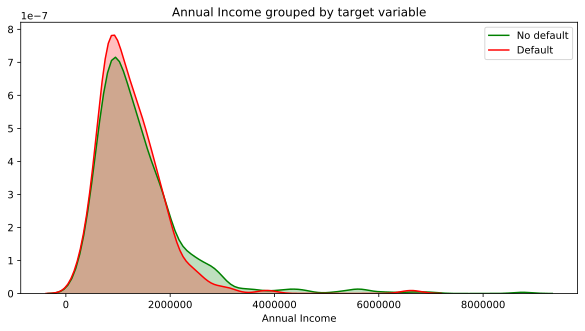

In [140]:
f_annual_income, annual_income_0, annual_income_1, annual_income_with_target = depend_func(variable = 'Annual Income')

In [141]:
shapiro(f_annual_income)

(nan, 1.0)

Принимаем нулевую гипотезу, мат ожидания совпадают. 

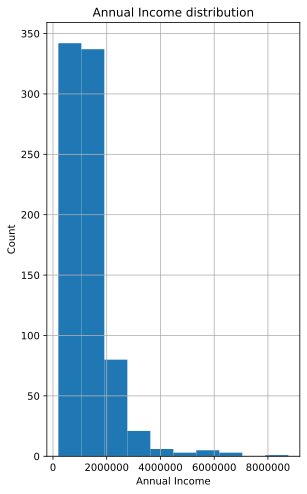

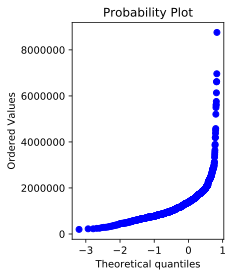

In [142]:
plt.figure(figsize=(10, 8))

ax1 = plt.subplot(121)
ax1.set_xlabel('Annual Income')
ax1.set_ylabel('Count')
ax1.set_title('Annual Income distribution')
f_annual_income.hist()
plt.show()

plt.subplot(122)
probplot(f_annual_income, dist='norm', plot=plt)

plt.show()

In [139]:
mannwhitneyu(annual_income_0, annual_income_1)

MannwhitneyuResult(statistic=92180.0, pvalue=0.020164353227807498)

pvalue<alpha, следовательно, распределение не является нормальным. 

В настоящий момент разобрали пока три признака в разрезе целевой переменной. Необходимо провести анализ всех признаков кроме категориальных. 

**Анализ признакового пространства**

**Матрица корреляций**

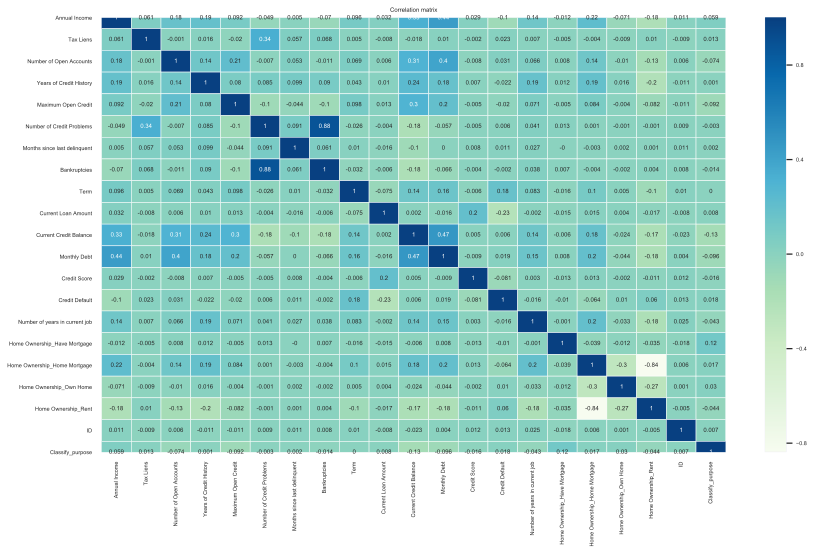

In [327]:
plt.figure(figsize = (14,8))

sns.set(font_scale=0.5)
sns.heatmap(fin_df.corr().round(3), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

Проверка на мультиколлинеарность: 
    - Подумать, как объединить Home Ownership (Home Mortgage, Own Home, Rent). Что использовать: K-means или PCA? 

- Выбросы обрабатывали на предыдущем уроке. 

Вопросы
- В чём различие между зависимыми и независимыми выборками?
- Когда применяются параметрические статистические критерии, а когда — их непараметрические аналоги?

Зависимые выборки содержат результаты, полученные на одной и том же датасете (или группе), но в разные моменты времени. Например, показатели анализа крови у одних и тех же пациентов до и после лечения. 

Выборки являются независимыми, если набор объектов исследования в каждую из групп осуществлялся независимо от того, какие объекты исследования включены в другую группу. Так, в частности, происходит при рандомизации, когда распределение объектов происходит случайным образом. Примером сравнения независимых выборок может служить сопоставление данных анализа крови в группе пациентов с аналогичными показателями в группе здоровых. 

Параметрические критерии – критерии, основанные на оценке параметров распределения, к которым относятся среднее арифметическое, среднеквадратическое отклонение, дисперсия. Они  применимы только в том случае, если численные данные подчиняются нормальному распределению. Если распределение отличается от нормального, то следует пользоваться так называемыми непараметрическими критериями.

Непараметрические критерии не основаны на оценке параметров распределения и вообще не требуют, чтобы данные подчинялись какому-то определенному типу распределения.  Непараметрические критерии дают более грубые оценки, чем параметрические, но являются более универсальными. А параметрические методы более точны, но лишь в случае, если правильно определено распределение совокупности.